In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Advertising dataset
# To load Dataset
df=pd.read_csv("mall.csv")

In [3]:
df.head()

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


In [4]:
#how many rows and columns in given dataset
df.shape

(303, 2)

In [5]:
#to check null values
df.isnull().sum()

INCOME    0
SPEND     0
dtype: int64

In [6]:
# to check datatypes
df.dtypes

INCOME    int64
SPEND     int64
dtype: object

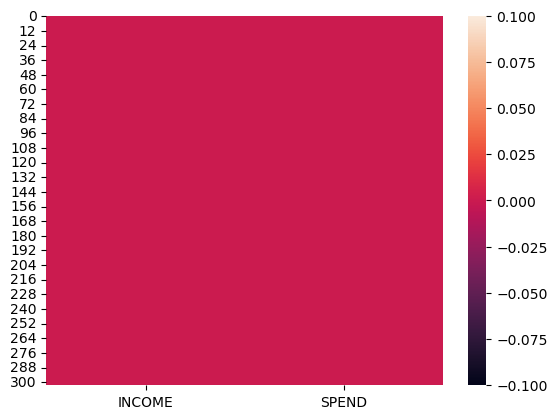

In [7]:
#visualise null values
sb.heatmap(df.isnull())
plt.show()

In [8]:
#select input
X=df.copy()  #copy() inbuilt method, to copy all rows and columns from dataframe df to X


In [9]:
X

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163
...,...,...
298,241,123
299,264,132
300,193,141
301,131,115


In [10]:
df

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163
...,...,...
298,241,123
299,264,132
300,193,141
301,131,115


In [11]:
#apply StandardScaler on input X 
from sklearn.preprocessing import StandardScaler

In [12]:
#create objct of StandardScaler class
ss=StandardScaler()
X=ss.fit_transform(X)
X

array([[-0.25349239,  0.01544279],
       [ 0.09760718,  1.63347147],
       [-0.85242694,  0.97751389],
       [-0.19153364,  1.23989692],
       [ 2.24551041,  0.58393935],
       [-1.10026193, -0.07201822],
       [ 1.00633547,  0.1466343 ],
       [ 0.36609508,  1.0212444 ],
       [-0.95569152,  0.54020884],
       [-1.59593191,  1.0649749 ],
       [-0.12957489,  0.45274783],
       [ 0.61393007, -0.46559277],
       [ 0.42805383,  0.93378339],
       [-0.70785653, -0.24694024],
       [ 0.7791534 ,  0.54020884],
       [-0.54263321,  0.36528682],
       [ 1.95636959,  0.97751389],
       [-0.3980628 , -1.55885539],
       [ 0.03564843,  0.93378339],
       [-0.12957489,  0.05917329],
       [-0.23283947,  0.49647834],
       [-0.25349239,  1.28362743],
       [-0.3980628 ,  1.23989692],
       [-0.04696323, -0.55305378],
       [-0.95569152,  1.23989692],
       [ 1.1715588 ,  0.54020884],
       [-0.68720362,  0.32155632],
       [-1.4513615 , -1.16528085],
       [ 3.54664411,

In [13]:
#find how many pattern or clusters in given dataset, use inbuilt
#method Elbow method : use inbuilt class Kmeans inner class----> define
#outer class cluster ---> package sklearn
from sklearn.cluster import KMeans

In [14]:
#suppose min = 1 clusters and max = 20 clusters

#create a two empty list for no.of clusters ans Sum of squared error SSE
SSE=[] #declare empty list for sum of squared error
K=[] #declare empty list for no . of clusters
for i in range(1,21):
    km=KMeans(n_clusters=i,random_state=1)
    km.fit(X)
    SSE.append(km.inertia_)
    K.append(i)



In [15]:
print(SSE)

[606.0, 401.2249781212488, 253.6106333888326, 199.40902844561705, 155.78714284970997, 131.55210185496475, 114.71735821194818, 101.86275852065161, 89.3262862661092, 81.85142800188837, 72.82117324863732, 66.13206126228042, 62.08766007361795, 56.48258904938618, 52.80779901588418, 48.93044725667822, 45.22333450304184, 43.809229503342436, 39.96963524117791, 38.25204716611]


In [16]:
K

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [17]:
dict={'K' :K,'SSE' :SSE}
df1=pd.DataFrame(dict)
df1

,K,SSE
0,1,606.000000
1,2,401.224978
2,3,253.610633
3,4,199.409028
4,5,155.787143
5,6,131.552102
6,7,114.717358
7,8,101.862759
8,9,89.326286
9,10,81.851428


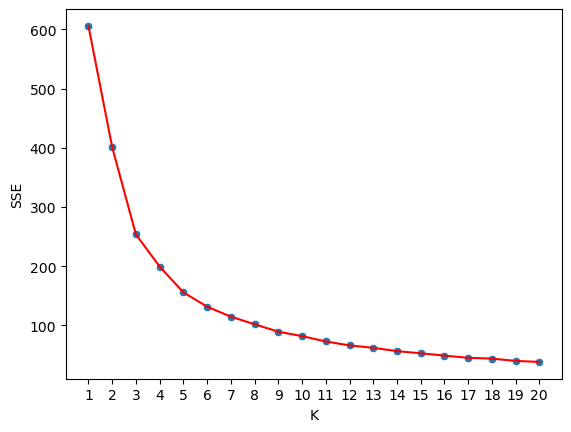

In [18]:
#Visualisation between K and SSE (SSe means sum of squared error)
#Scatter plot
sb.scatterplot(data=df1,x='K',y='SSE')
sb.lineplot(data=df1,x='K',y='SSE' ,color='red')
plt.xticks(df1['K'])
plt.show()

In [19]:
#clearly see No of cluster =5 in elbow visualise
#here k=5
#create the object of KMeans class
km=KMeans(n_clusters=5,random_state=1)

In [20]:
#use inbuilt method fit_product() of Kmeans Algorithm
Y_pred=km.fit_predict(X)

In [21]:
Y_pred

array([3, 2, 2, 2, 1, 0, 1, 3, 2, 2, 3, 3, 3, 0, 1, 2, 1, 0, 2, 3, 3, 2,
       2, 3, 2, 1, 2, 0, 1, 2, 2, 0, 2, 3, 0, 2, 1, 2, 3, 1, 1, 2, 3, 3,
       1, 1, 2, 3, 0, 3, 3, 1, 3, 2, 2, 2, 2, 2, 2, 1, 4, 1, 2, 0, 2, 2,
       3, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2, 1, 1, 1, 4, 3, 3, 2,
       2, 4, 2, 2, 2, 1, 0, 0, 1, 3, 1, 2, 2, 3, 2, 2, 2, 0, 0, 3, 3, 3,
       1, 2, 1, 2, 3, 2, 2, 2, 2, 3, 4, 2, 3, 3, 2, 2, 0, 3, 2, 4, 2, 3,
       1, 3, 1, 3, 0, 0, 0, 4, 1, 1, 2, 3, 0, 3, 3, 2, 2, 0, 3, 0, 3, 3,
       3, 0, 2, 2, 3, 2, 2, 1, 2, 2, 2, 4, 0, 3, 3, 2, 3, 2, 1, 2, 0, 0,
       3, 1, 0, 4, 1, 0, 1, 2, 4, 1, 3, 4, 2, 2, 1, 0, 0, 3, 2, 1, 3, 3,
       4, 3, 2, 3, 4, 3, 0, 3, 3, 3, 0, 2, 3, 3, 0, 1, 3, 1, 4, 1, 4, 3,
       1, 0, 1, 4, 4, 0, 4, 0, 1, 4, 3, 4, 1, 4, 4, 1, 1, 1, 1, 3, 4, 3,
       0, 4, 0, 3, 1, 4, 2, 3, 4, 3, 4, 4, 4, 1, 4, 0, 3, 2, 2, 3, 4, 3,
       0, 0, 4, 0, 4, 4, 3, 3, 4, 3, 4, 2, 0, 3, 1, 0, 4, 2, 0, 2, 0, 4,
       2, 2, 1, 0, 2, 1, 3, 3, 0, 0, 0, 0, 4, 4, 0,

In [22]:
df.head()

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


In [23]:
# to add new column (output column) in existing dataframe df : target
df['Target']=Y_pred
df.head(10)

,INCOME,SPEND,Target
0,233,150,3
1,250,187,2
2,204,172,2
3,236,178,2
4,354,163,1
5,192,148,0
6,294,153,1
7,263,173,3
8,199,162,2
9,168,174,2


In [24]:
df['Target'].value_counts()

Target
2    86
3    78
1    50
0    50
4    39
Name: count, dtype: int64

In [25]:
#Create 5 dataframe named df_0 , df_1 ,df_2 ,df_3,df_4 according to category
df_0=df[df['Target']==0]
df_0

,INCOME,SPEND,Target
5,192,148,0
13,211,144,0
17,226,114,0
27,175,123,0
31,177,140,0
34,213,125,0
48,216,115,0
63,203,132,0
94,160,138,0
95,226,111,0


In [26]:
df_1=df[df['Target']==1]
df_2=df[df['Target']==2]
df_3=df[df['Target']==3]
df_4=df[df['Target']==4]

In [27]:
df_0.shape,df_1.shape,df_2.shape,df_3.shape,df_4.shape

((50, 3), (50, 3), (86, 3), (78, 3), (39, 3))

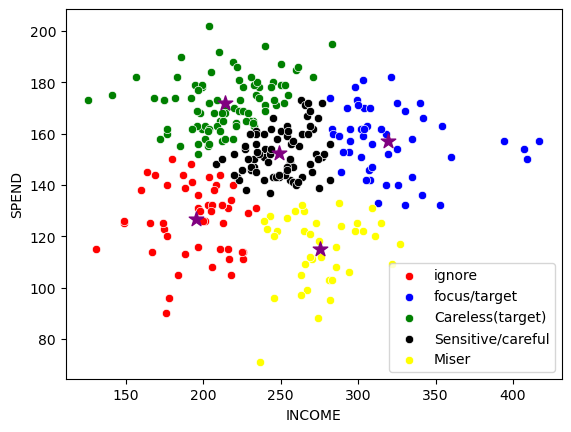

In [28]:
#visualisation
sb.scatterplot(data=df_0,x='INCOME',y='SPEND',color='red', label='ignore')
sb.scatterplot(data=df_1,x='INCOME',y='SPEND',color='blue', label='focus/target')
sb.scatterplot(data=df_2,x='INCOME',y='SPEND',color='green', label='Careless(target)')
sb.scatterplot(data=df_3,x='INCOME',y='SPEND',color='black', label='Sensitive/careful')
sb.scatterplot(data=df_4,x='INCOME',y='SPEND',color='yellow',label='Miser')

#plt.scatter(x,y)
plt.scatter(ss.inverse_transform(km.cluster_centers_)[0:,0],
            ss.inverse_transform(km.cluster_centers_)[:,1],color='purple' , marker='*',s=120)
plt.show()

In [29]:
# check centroid of each clusters , use inbuilts method
#cluster_centers_ of KMeans algorithm
km.cluster_centers_

array([[-1.03582484, -1.00172876],
       [ 1.53298482,  0.33205164],
       [-0.64637809,  0.96937799],
       [ 0.08172032,  0.11916257],
       [ 0.62452131, -1.51736748]])

In [30]:
# To remove scaling 
ss.inverse_transform(km.cluster_centers_)

array([[195.12      , 126.74      ],
       [319.5       , 157.24      ],
       [213.97674419, 171.81395349],
       [249.23076923, 152.37179487],
       [275.51282051, 114.94871795]])

In [ ]:
# PCA : principle component analysis : To reduce Dimension
# it is also known as Dimensionality Reduction method.
# it is used to Extract features means to extract important features from tables
# means it select imp features automatic without using any methods from table
# 1 input = 1 dimension : suppose we have 100 inputs means 100 dimensions
